# Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

!pip install feature_engine
!pip install category_encoders

     |████████████████████████████████| 153kB 8.1MB/s 
     |████████████████████████████████| 9.5MB 34.4MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
     |████████████████████████████████| 81kB 5.0MB/s 


# Missing Data Imputation (Univariate)

## Load Data

In [ ]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('source_code/Datasets/houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

## Numerical Variables

### Mean / Median Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import MeanMedianImputer

# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case 
imputer = MeanMedianImputer(imputation_method='median')

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer found the numerical variables to impute with the mean
imputer.variables

# here we can see the mean assigned to each variable
imputer.imputer_dict_

# let's check that the numerical variables don't contain NA any more
tmp[imputer.variables].isnull().mean()


# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,69.0,573.0,1998.0
682,Gd,Gd,69.0,0.0,1996.0
960,TA,NaN,50.0,0.0,1979.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


### Arbitrary Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

# we call the imputer from feature-engine
# we specify the arbitrary value as an argument
imputer = ArbitraryNumberImputer(arbitrary_number = -999)

# We can impute different variables with different numbers
## let's look at the distributions to determine the arbitraty values to use
## X_train.hist()
## imputer = ArbitraryNumberImputer(imputer_dict={'LotFrontage': -999, 'MasVnrArea': -999, 'GarageYrBlt': -1})

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer found the numerical variables to impute with the arbitrary value
imputer.variables

# here we can see the arbitrary value stored
imputer.arbitrary_number

# let's check that the numerical variables don't contain NA any more
tmp[imputer.variables].isnull().mean()

# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


### End of Tail Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import EndTailImputer

# we call the imputer from feature-engine
# we specify whether we want to find the values using the gaussian approximation or the inter-quantal range proximity rule.
# in addition we need to specify if we want the values placed at the left or right tail
imputer = EndTailImputer(imputation_method='gaussian', tail='right')

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer found the numerical variables to impute with the end of distribution value
imputer.variables

# here we can see the values that will be used to replace NA for each variable
imputer.imputer_dict_

# and this is how those values were calculated which is how we learnt in the first notebooks of this section
X_train[imputer.variables].mean() + 3 * X_train[imputer.variables].std()

# let's check that the numerical variables don't contain NA any more
tmp[imputer.variables].isnull().mean()

# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.000000
682,Gd,Gd,138.90222,0.0,1996.000000
960,TA,NaN,50.00000,0.0,2052.970742
1384,TA,NaN,60.00000,0.0,1939.000000
1100,TA,NaN,60.00000,0.0,1930.000000


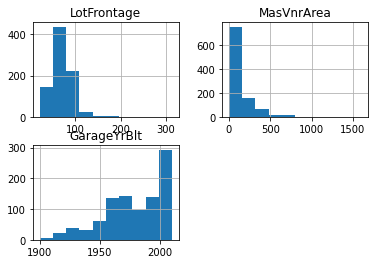

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.0
682,Gd,Gd,138.90222,0.0,1996.0
960,TA,NaN,50.00000,0.0,2121.0
1384,TA,NaN,60.00000,0.0,1939.0
1100,TA,NaN,60.00000,0.0,1930.0


In [ ]:
# Feature-engine can be used with the Scikit-learn pipeline

# let's look at the distributions to determine the end tail value selection method
X_train.hist()
plt.show()

# All variables are skewed. For this demo, I will use the proximity rule for GarageYrBlt and MasVnrArea, and the Gaussian approximation for LotFrontage.
pipe = Pipeline([
    ('imputer_skewed', EndTailImputer(imputation_method='iqr', tail='right',
                                      variables=['GarageYrBlt', 'MasVnrArea'])),

    ('imputer_gaussian', EndTailImputer(imputation_method='gaussian', tail='right',
                                        variables=['LotFrontage'])),
])

pipe.fit(X_train)
pipe.named_steps['imputer_skewed'].imputer_dict_
pipe.named_steps['imputer_gaussian'].imputer_dict_

# let's transform the data with the pipeline
tmp = pipe.transform(X_train)
tmp.head()

## Categorical Variables

### Most Frequent Category Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import CategoricalImputer

# we call the imputer from feature-engine we don't need to specify anything 
imputer = CategoricalImputer(imputation_method='frequent')

# let's do it imputation but this time and let's do it over 1 of the 2 categorical variables
# imputer =CategoricalImputer(imputation_method='frequent', variables=['BsmtQual'])

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer found the categorical variables to impute with the frequent category
imputer.variables

# here we can see the values that will be used to replace NA for each variable
imputer.imputer_dict_

# let's check those values agains the train data
X_train[imputer.variables].mode()

# let's check that the numerical variables don't contain NA any more
tmp[imputer.variables].isnull().mean()

# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,Gd,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,Gd,50.0,0.0,NaN
1384,TA,Gd,60.0,0.0,1939.0
1100,TA,Gd,60.0,0.0,1930.0


### Missing Category Imputation

In [ ]:
# we call the imputer from feature engine, we don't need to specify anything 
imputer = CategoricalImputer()
# imputer = CategoricalImputer(variables=['BsmtQual'])

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer found the categorical variables to impute with the missing category
imputer.variables

# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,Missing,NaN,573.0,1998.0
682,Gd,Gd,NaN,0.0,1996.0
960,TA,Missing,50.0,0.0,NaN
1384,TA,Missing,60.0,0.0,1939.0
1100,TA,Missing,60.0,0.0,1930.0


## Numerical and Categorical Variables

### Random Sample Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import RandomSampleImputer

# we call the imputer from feature-engine, we don't need to specify anything 
imputer = RandomSampleImputer(random_state = 29)

# we fit the imputer
imputer.fit(X_train)

# we see that the imputer selected all the variables numerical and categorical
imputer.variables

# the imputer stores a copy of the selected variables from the train set, from which to extract the random sample
imputer.X_.head()

# let's check absence of NA
tmp[imputer.variables].isnull().mean()

# feature-engine returns a dataframe
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,TA,60.0,573.0,1998.0
682,Gd,Gd,90.0,0.0,1996.0
960,TA,Gd,50.0,0.0,1977.0
1384,TA,Gd,60.0,0.0,1939.0
1100,TA,Gd,60.0,0.0,1930.0


### Missing Indicator Imputation

In [ ]:
# from feature-engine
from feature_engine.imputation import (
    AddMissingIndicator,
    MeanMedianImputer,
    CategoricalImputer
)

# we call the imputer from feature-engine,
# the argument how allows us to determine if we want to add missing indicators to all variables, or only to those that showed missing data in the train set
imputer = AddMissingIndicator(missing_only=True)

# we fit the imputer
imputer.fit(X_train)

# this attribute stores the variables, numerical and categorical, if they showed missing data in the train set
imputer.variables_

# feature-engine returns a dataframe with the additional features
tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_na,FireplaceQu_na,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
64,Gd,NaN,NaN,573.0,1998.0,0,1,1,0,0
682,Gd,Gd,NaN,0.0,1996.0,0,0,1,0,0
960,TA,NaN,50.0,0.0,NaN,0,1,0,0,1
1384,TA,NaN,60.0,0.0,1939.0,0,1,0,0,0
1100,TA,NaN,60.0,0.0,1930.0,0,1,0,0,0


In [ ]:
# Feature-engine can be used with the Scikit-learn pipeline

These are the steps we will concatenate

* Add Missing Indicator to all variables
* Median Imputation to numerical variables
* Frequent category imputation to categorical variables

In [ ]:
pipe = Pipeline([
    ('missing_ind', AddMissingIndicator()),

    ('imputer_mode', CategoricalImputer(
        imputation_method='frequent', variables=['FireplaceQu', 'BsmtQual'])),

    ('imputer_median', MeanMedianImputer(imputation_method='median',
                                         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
])

# fit the pipe
pipe.fit(X_train)

# inspect the separate steps
pipe.named_steps['missing_ind'].variables_
pipe.named_steps['imputer_mode'].imputer_dict_
pipe.named_steps['imputer_median'].imputer_dict_

# let's transform the data with the pipeline
# this pipeline will:
#- add the missing indicators
#- fill na in the original variables
# leaving the dataset ready to use for ML
tmp = pipe.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt,BsmtQual_na,FireplaceQu_na,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
64,Gd,Gd,69.0,573.0,1998.0,0,1,1,0,0
682,Gd,Gd,69.0,0.0,1996.0,0,0,1,0,0
960,TA,Gd,50.0,0.0,1979.0,0,1,0,0,1
1384,TA,Gd,60.0,0.0,1939.0,0,1,0,0,0
1100,TA,Gd,60.0,0.0,1930.0,0,1,0,0,0


# Missing Data Imputation (Multivariate)

## KNN Imputation

In [ ]:
# list with numerical varables

cols_to_use = [
    'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
    'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
    'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
    'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
    'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
    'WoodDeckSF',  'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
    'SalePrice'
]

data = pd.read_csv('source_code/Datasets/houseprice.csv', usecols=cols_to_use)
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 36), (438, 36))

In [ ]:
# multivariate imputation
from sklearn.impute import KNNImputer
from feature_engine.wrappers import SklearnTransformerWrapper

# start the KNNimputer inside the SKlearnTransformerWrapper
imputer = SklearnTransformerWrapper(
    transformer = KNNImputer(weights='distance'),
    variables = cols_to_use,
)

# fit the wrapper + KNNImputer
imputer.fit(X_train)

# transform the data
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# no NA after the imputation
train_t['MasVnrArea'].isnull().sum()

# feature-engine returns a dataframe
train_t.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,60.0,70.115142,9375.0,7.0,5.0,1997.0,1998.0,573.0,739.0,0.0,318.0,1057.0,1057.0,977.0,0.0,2034.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,1998.000000,2.0,645.0,576.0,36.0,0.0,0.0,0.0,0.0,0.0,2.0,2009.0
682,120.0,42.533053,2887.0,6.0,5.0,1996.0,1997.0,0.0,1003.0,0.0,288.0,1291.0,1291.0,0.0,0.0,1291.0,1.0,0.0,1.0,0.0,2.0,1.0,6.0,1.0,1996.000000,2.0,431.0,307.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2008.0
960,20.0,50.000000,7207.0,5.0,7.0,1958.0,2008.0,0.0,696.0,0.0,162.0,858.0,858.0,0.0,0.0,858.0,1.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,1967.012893,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1384,50.0,60.000000,9060.0,6.0,5.0,1939.0,1950.0,0.0,204.0,0.0,356.0,560.0,698.0,560.0,0.0,1258.0,0.0,0.0,1.0,0.0,2.0,1.0,6.0,0.0,1939.000000,1.0,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2009.0
1100,30.0,60.000000,8400.0,2.0,5.0,1920.0,1950.0,0.0,290.0,0.0,0.0,290.0,438.0,0.0,0.0,438.0,0.0,0.0,1.0,0.0,1.0,1.0,3.0,0.0,1930.000000,1.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2009.0


In [ ]:
## Automatically find best imputation parameters
# We can optimise the parameters of the KNN imputation to better predict our outcome.

# import extra classes for modelling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe = Pipeline(steps=[
    ('imputer', KNNImputer(
        n_neighbors=5,
        weights='distance',
        add_indicator=False)),
    
    ('scaler', StandardScaler()),
    ('regressor', Lasso(max_iter=2000)),
])

# now we create the grid with all the parameters that we would like to test
param_grid = {
    'imputer__n_neighbors': [3,5,10],
    'imputer__weights': ['uniform', 'distance'],
    'imputer__add_indicator': [True, False],
    'regressor__alpha': [10, 100, 200],
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring='r2')

# cv=3 is the cross-validation
# no_jobs =-1 indicates to use all available cpus
# scoring='r2' indicates to evaluate using the r squared

# for more details in the grid parameters visit:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_train, y_train)))


# let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

# and find the best parameters
grid_search.best_params_

best linear regression from grid search: 0.845
best linear regression from grid search: 0.730


{'imputer__add_indicator': True,
 'imputer__n_neighbors': 10,
 'imputer__weights': 'distance',
 'regressor__alpha': 200}

## MICE Imputation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

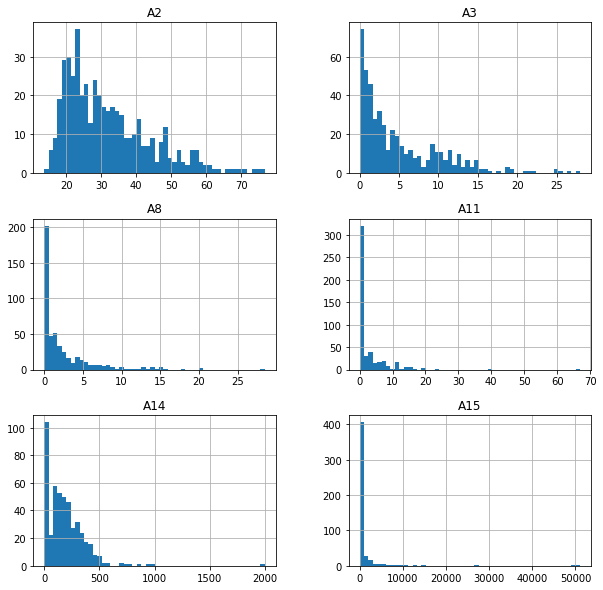

In [ ]:
# load data with numerical variables
variables = ['A2','A3','A8', 'A11', 'A14', 'A15', 'A16']
data = pd.read_csv('source_code/Datasets/creditApprovalUCI.csv', usecols=variables)
data.head()

# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

# find the percentage of missing data within those variables
X_train.isnull().mean()

X_train.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
# let's create a MICE imputer using Bayes as estimator
imputer = IterativeImputer(
    estimator=BayesianRidge(), # the estimator to predict the NA
    initial_strategy='mean', # how will NA be imputed in step 1
    max_iter=10, # number of cycles
    imputation_order='ascending', # the order in which to impute the variables
    n_nearest_features=None, # whether to limit the number of predictors
    skip_complete=True, # whether to ignore variables without NA
    random_state=0,
)

# perform MICE
imputer.fit(X_train)

# transform the data - replace the missing values
train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# after the imputation there is no more data missing
pd.DataFrame(train_t, columns=X_train.columns).isnull().sum()

pd.DataFrame(train_t, columns=X_train.columns).head()

,A2,A3,A8,A11,A14,A15
0,46.08,3.000,2.375,8.0,396.0,4159.0
1,15.92,2.875,0.085,0.0,120.0,0.0
2,36.33,2.125,0.085,1.0,50.0,1187.0
3,22.17,0.585,0.000,0.0,100.0,0.0
4,57.83,7.040,14.000,6.0,360.0,1332.0


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


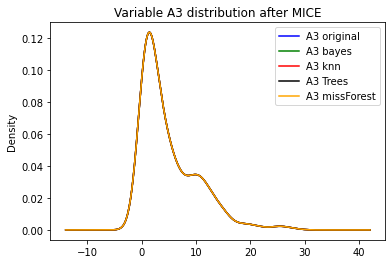

In [ ]:
# Using different models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('A16', axis=1), data['A16'], test_size=0.3, random_state=0)

imputer_bayes = IterativeImputer(
    estimator=BayesianRidge(),
    max_iter=10,
    random_state=0)

imputer_knn = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=5),
    max_iter=10,
    random_state=0)

imputer_nonLin = IterativeImputer(
    estimator=DecisionTreeRegressor(max_features='sqrt', random_state=0),
    max_iter=10,
    random_state=0)

imputer_missForest = IterativeImputer(
    estimator=ExtraTreesRegressor(n_estimators=10, random_state=0),
    max_iter=10,
    random_state=0)

# train the model
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonLin.fit(X_train)
imputer_missForest.fit(X_train)

# replace NA
X_train_bayes = imputer_bayes.transform(X_train)
X_train_knn = imputer_knn.transform(X_train)
X_train_nonLin = imputer_nonLin.transform(X_train)
X_train_missForest = imputer_missForest.transform(X_train)

predictors = [var for var in variables if var !='A16']

# transform numpy array to dataframe
X_train_bayes = pd.DataFrame(X_train_bayes, columns = predictors)
X_train_knn = pd.DataFrame(X_train_knn, columns = predictors)
X_train_nonLin = pd.DataFrame(X_train_nonLin, columns = predictors)
X_train_missForest = pd.DataFrame(X_train_missForest, columns = predictors)

# plot the distribution of the imputed variable
fig = plt.figure()
ax = fig.add_subplot(111)

X_train['A3'].plot(kind='kde', ax=ax, color='blue')
X_train_bayes['A3'].plot(kind='kde', ax=ax, color='green')
X_train_knn['A3'].plot(kind='kde', ax=ax, color='red')
X_train_nonLin['A3'].plot(kind='kde', ax=ax, color='black')
X_train_missForest['A3'].plot(kind='kde', ax=ax, color='orange')

# add legends
lines, labels = ax.get_legend_handles_labels()
labels = ['A3 original', 'A3 bayes', 'A3 knn', 'A3 Trees', 'A3 missForest']
ax.legend(lines, labels, loc='best')
plt.title('Variable A3 distribution after MICE')
plt.show()

# Categorical Encoding

## One Hot Encoding

In [ ]:
# load titanic dataset
data = pd.read_csv('source_code/Datasets/titanic.csv')
data['cabin'] = data['cabin'].str[0]
data.loc[data.cabin == "?","cabin"] = np.nan
data.head()

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'cabin']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [ ]:
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

# Feature-Engine's one hot encoder also selects
# all categorical variables automatically
ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    drop_last=True)  # to return k-1, false to return k

ohe_enc.fit(X_train.fillna('Missing'))

train = ohe_enc.transform(X_train.fillna('Missing'))
print(train.head())

test = ohe_enc.transform(X_test.fillna('Missing'))
print(test.head())

# Note how this encoder returns a variable cabin_T for the test set as well, even though this category is not present in the test set. 
# This allows the integration with Scikit-learn pipeline and scoring of test set by the built algorithm

      sex_female  embarked_S  embarked_C  ...  cabin_A  cabin_F  cabin_T
501            1           1           0  ...        0        0        0
588            1           1           0  ...        0        0        0
402            1           0           1  ...        0        0        0
1193           0           0           0  ...        0        0        0
686            1           0           0  ...        0        0        0

[5 rows x 12 columns]
      sex_female  embarked_S  embarked_C  ...  cabin_A  cabin_F  cabin_T
1139           0           1           0  ...        0        0        0
533            1           1           0  ...        0        0        0
459            0           1           0  ...        0        0        0
1150           0           1           0  ...        0        0        0
393            0           1           0  ...        0        0        0

[5 rows x 12 columns]


## One Hot Encoding Top Categories

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=10,  # you can change this value to select more or less variables
    # we can select which variables to encode
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'],
    drop_last=False)

ohe_enc.fit(X_train)

# in the encoder dict we can observe each of the top categories selected for each of the variables
ohe_enc.encoder_dict_

# this is the list of variables that the encoder will transform
ohe_enc.variables

X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)

# let's explore the result
X_train.head()

,Neighborhood_NAmes,Neighborhood_CollgCr,Neighborhood_OldTown,Neighborhood_Edwards,Neighborhood_Sawyer,Neighborhood_Somerst,Neighborhood_Gilbert,Neighborhood_NridgHt,Neighborhood_NWAmes,Neighborhood_SawyerW,Exterior1st_VinylSd,Exterior1st_HdBoard,Exterior1st_Wd Sdng,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_CemntBd,Exterior1st_BrkFace,Exterior1st_WdShing,Exterior1st_Stucco,Exterior1st_AsbShng,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_CmentBd,Exterior2nd_Wd Shng,Exterior2nd_BrkFace,Exterior2nd_AsbShng,Exterior2nd_Stucco
64,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
682,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
960,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1384,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1100,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


## Label / Ordinal / Integer Encoding

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

ordinal_enc.fit(X_train)

# in the encoder dict we can observe the numbers assigned to each category for all the indicated variables
ordinal_enc.encoder_dict_

# this is the list of variables that the encoder will transform
ordinal_enc.variables

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,0,0,0
682,1,1,1
960,2,1,2
1384,3,2,3
1100,4,1,1


## Count or Frequency Encoding

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

count_enc.fit(X_train)

# in the encoder dict we can observe the number of observations per category for each variable
count_enc.encoder_dict_

X_train = count_enc.transform(X_train)
X_test = count_enc.transform(X_test)

# let's explore the result
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,105,364,353
682,24,148,142
960,41,148,112
1384,71,21,29
1100,18,148,142


## Ordered Integer Encoding

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv',
    usecols=['Neighborhood', 'Exterior1st', 'Exterior2nd', 'SalePrice'])

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['Neighborhood', 'Exterior1st', 'Exterior2nd']],  # predictors
    data['SalePrice'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [ ]:
# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    # NOTE that we indicate ordered in the encoding_method, otherwise it assings numbers arbitrarily
    encoding_method='ordered',
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd'])

# when fitting the transformer, we need to pass the target as well just like with any Scikit-learn predictor class
ordinal_enc.fit(X_train, y_train)

# in the encoder dict we can observe each of the top categories selected for each of the variables
ordinal_enc.encoder_dict_

# this is the list of variables that the encoder will transform
ordinal_enc.variables

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

# let's explore the result
X_train.head()

,Neighborhood,Exterior1st,Exterior2nd
64,16,11,13
682,17,5,7
960,4,5,8
1384,3,4,4
1100,8,5,7


## Mean Encoding

In [ ]:
# load titanic dataset
data = pd.read_csv('source_code/Datasets/titanic.csv')
data['cabin'] = data['cabin'].astype(str).str[0]
data['embarked'].fillna('Missing', inplace=True)
data.head()

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['sex', 'embarked', 'cabin']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [ ]:
# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

mean_enc = MeanEncoder(
    variables=['cabin', 'sex', 'embarked'])

# when fitting the transformer, we need to pass the target as well just like with any Scikit-learn predictor class
mean_enc.fit(X_train, y_train)

# in the encoder dict we see the target mean assigned to each category for each of the selected variables
mean_enc.encoder_dict_

# this is the list of variables that the encoder will transform
mean_enc.variables

X_train = mean_enc.transform(X_train)
X_test = mean_enc.transform(X_test)

# let's explore the result
X_train.head()

,sex,embarked,cabin
501,0.728358,0.338957,0.304843
588,0.728358,0.338957,0.304843
402,0.728358,0.553073,0.304843
1193,0.187608,0.373494,0.304843
686,0.728358,0.373494,0.304843


## Probability Ratio Encoding

In [ ]:
# load titanic dataset
data = pd.read_csv('source_code/Datasets/titanic.csv',usecols=['cabin', 'sex', 'embarked', 'survived'])
data.dropna(subset=['embarked'], inplace=True)
data = data[data.embarked != "?"]
data['cabin'] = data['cabin'].astype(str).str[0]
data = data[data['cabin']!= 'T']
data.head()

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((914, 4), (392, 4))

In [ ]:
# for encoding with feature-engine
from feature_engine.encoding import PRatioEncoder

ratio_enc = PRatioEncoder(
    encoding_method = 'ratio',
    variables=['cabin', 'sex', 'embarked'])

# when fitting the transformer, we need to pass the target as well just like with any Scikit-learn predictor class
ratio_enc.fit(X_train, y_train)

# in the encoder dict we see the P(1)/P(0) for each category for each of the indicated variables
ratio_enc.encoder_dict_

# this is the list of variables that the encoder will transform
ratio_enc.variables

X_train = ratio_enc.transform(X_train)
X_test = ratio_enc.transform(X_test)

# let's explore the result
X_train.head()

,cabin,sex,embarked,survived
843,0.412826,0.218107,0.509434,0
869,0.412826,0.218107,0.509434,0
430,0.412826,2.788235,0.509434,1
481,0.412826,2.788235,1.160920,1
1308,0.412826,0.218107,0.509434,0


## Weight of Evidence Encoding

In [ ]:
# load titanic dataset
data = pd.read_csv('source_code/Datasets/titanic.csv',usecols=['cabin', 'sex', 'embarked', 'survived'])
data.dropna(subset=['embarked'], inplace=True)
data = data[data.embarked != "?"]
data['cabin'] = data['cabin'].astype(str).str[0]
data = data[data['cabin']!= 'T']
data.head()

# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data[['cabin', 'sex', 'embarked', 'survived']],  # this time we keep the target!!
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((914, 4), (392, 4))

In [ ]:
# for encoding using feature-engine
from feature_engine.encoding import WoEEncoder as fe_WoEEncoder
from category_encoders.woe import WOEEncoder

woe_enc = fe_WoEEncoder(variables=['cabin', 'sex', 'embarked'])

# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class
woe_enc.fit(X_train, y_train)

# in the encoder dict we see the woe for each category
# for each of the selected variables
woe_enc.encoder_dict_

# this is the list of variables that the encoder will transform
woe_enc.variables

X_train = woe_enc.transform(X_train)
X_test = woe_enc.transform(X_test)

# let's explore the result
X_train.head()

,cabin,sex,embarked,survived
843,-0.375071,-1.013111,-0.164796,0
869,-0.375071,-1.013111,-0.164796,0
430,-0.375071,1.535068,-0.164796,1
481,-0.375071,1.535068,0.658871,1
1308,-0.375071,-1.013111,-0.164796,0


## Rare Categories Encoding

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv')

# let's divide into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1), # predictors
    data.SalePrice, # target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 80), (438, 80))

In [ ]:
from feature_engine.encoding import RareLabelEncoder

# Rare value encoder
rare_encoder = RareLabelEncoder(
    tol=0.05,  # minimal percentage to be considered non-rare
    n_categories=4, # minimal number of categories the variable should have to re-cgroup rare categories
    variables=['Neighborhood', 'Exterior1st', 'Exterior2nd',
               'MasVnrType', 'ExterQual', 'BsmtCond'] # variables to re-group
) 

rare_encoder.fit(X_train.fillna('Missing'))

rare_encoder.variables

# the encoder_dict_ is a dictionary of variable: frequent labels pair
rare_encoder.encoder_dict_

X_train = rare_encoder.transform(X_train.fillna('Missing'))
X_test = rare_encoder.transform(X_test.fillna('Missing'))

X_train.head()

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable ExterQual is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
64,65,60,RL,Missing,9375,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573,TA,TA,PConc,Gd,TA,No,GLQ,739,Unf,0,318,1057,GasA,Ex,Y,SBrkr,1057,977,0,2034,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,1998,RFn,2,645,TA,TA,Y,576,36,0,0,0,0,Missing,GdPrv,Missing,0,2,2009,WD,Normal
682,683,120,RL,Missing,2887,Pave,Missing,Reg,HLS,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,6,5,1996,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,PConc,Gd,TA,Mn,GLQ,1003,Unf,0,288,1291,GasA,Ex,Y,SBrkr,1291,0,0,1291,1,0,1,0,2,1,Gd,6,Typ,1,Gd,Attchd,1996,Unf,2,431,TA,TA,Y,307,0,0,0,0,0,Missing,Missing,Missing,0,11,2008,WD,Normal
960,961,20,RL,50,7207,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,None,0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,Missing,Missing,Missing,Missing,0,0,Missing,Missing,Y,117,0,0,0,0,0,Missing,Missing,Missing,0,2,2010,WD,Normal
1384,1385,50,RL,60,9060,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,5,1939,1950,Gable,CompShg,Rare,Rare,None,0,TA,TA,BrkTil,TA,TA,Mn,Rec,204,Unf,0,356,560,GasA,TA,Y,SBrkr,698,560,0,1258,0,0,1,0,2,1,TA,6,Typ,0,Missing,Detchd,1939,Unf,1,280,TA,TA,P,0,0,0,0,0,0,Missing,MnPrv,Missing,0,10,2009,WD,Normal
1100,1101,30,RL,60,8400,Pave,Missing,Reg,Bnk,AllPub,Inside,Gtl,Rare,Norm,Norm,1Fam,1Story,2,5,1920,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0,TA,TA,CBlock,TA,Rare,No,Rec,290,Unf,0,0,290,GasA,TA,N,FuseF,438,0,0,438,0,0,1,0,1,1,Fa,3,Typ,0,Missing,Detchd,1930,Unf,1,246,TA,TA,N,0,0,0,0,0,0,Missing,Missing,Missing,0,1,2009,WD,Normal


# Variable Transformation

In [ ]:
import feature_engine.transformation as vt

# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

In [ ]:
# load dataset
data = pd.read_csv(
    'source_code/Datasets/houseprice.csv')

## Log Transformation

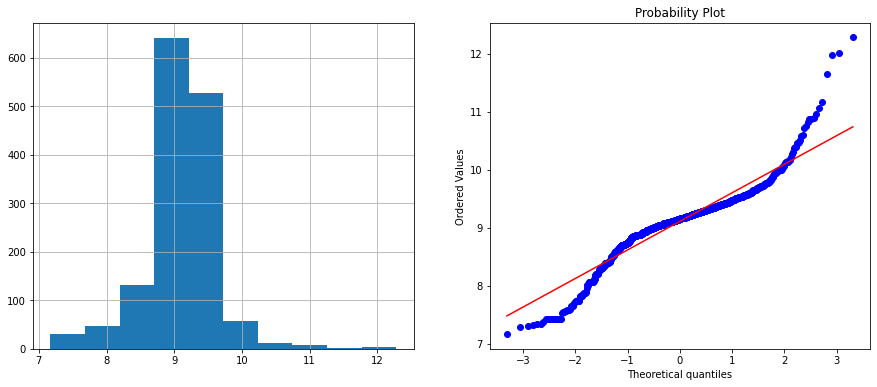

In [ ]:
lt = vt.LogTransformer(variables = ['LotArea', 'GrLivArea'])
lt.fit(data)

# variables that will be transformed
lt.variables
data_tf = lt.transform(data)
diagnostic_plots(data_tf, 'LotArea')

## Reciprocal Transformation

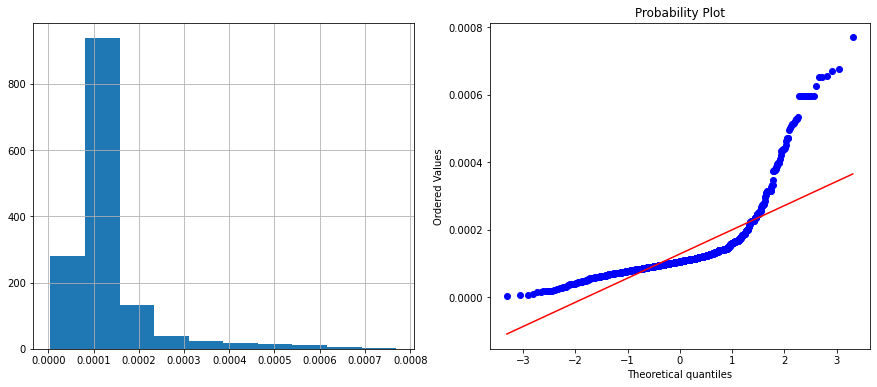

In [ ]:
rt = vt.ReciprocalTransformer(variables = ['LotArea', 'GrLivArea'])
rt.fit(data)

data_tf = rt.transform(data)
diagnostic_plots(data_tf, 'LotArea')

## Exponential Transformation

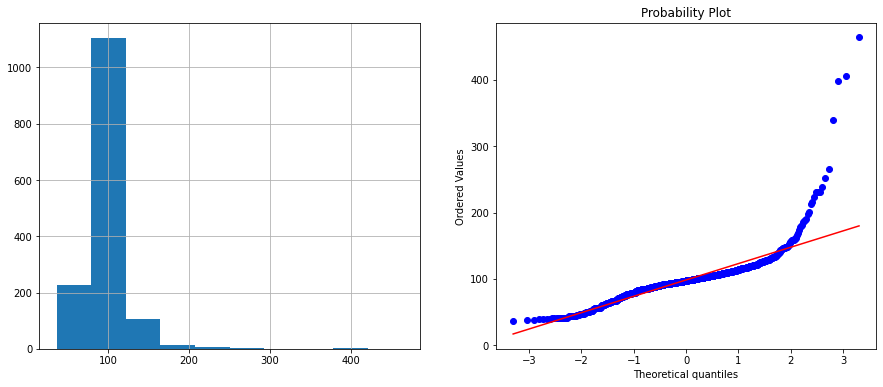

In [ ]:
et = vt.PowerTransformer(variables = ['LotArea', 'GrLivArea'])
et.fit(data)

data_tf = et.transform(data)
diagnostic_plots(data_tf, 'LotArea')

## BoxCox Transformation

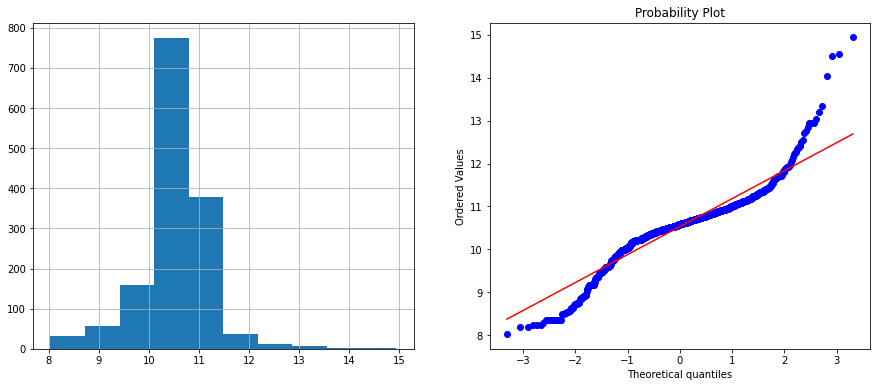

In [ ]:
bct = vt.BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])
bct.fit(data)

# these are the exponents for the BoxCox transformation
bct.lambda_dict_

data_tf = bct.transform(data)
diagnostic_plots(data_tf, 'LotArea')

## Yeo-Johnson Transformation

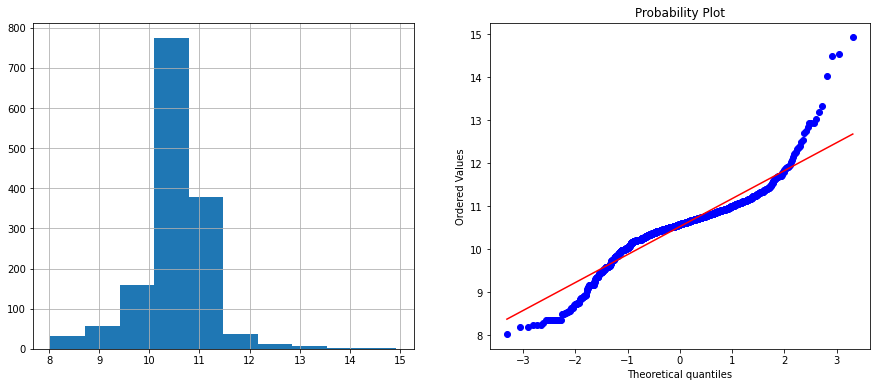

In [ ]:
yjt = vt.YeoJohnsonTransformer(variables = ['LotArea', 'GrLivArea'])
yjt.fit(data)

# these are the exponents for the Yeo-Johnson transformation
yjt.lambda_dict_

data_tf = yjt.transform(data)
diagnostic_plots(data_tf, 'LotArea')

# Discretisation

## Load Data

In [ ]:
# load titanic dataset
data = pd.read_csv('source_code/Datasets/titanic.csv',usecols=['age', 'fare', 'survived'])
data = data[data.age != "?"]
data = data[data.fare != "?"]
data["age"] = data["age"].astype("float64")
data["fare"] = data["fare"].astype("float64")

# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

def impute_na(data, variable):

    df = data.copy()

    # random sampling
    df[variable + '_random'] = df[variable]

    # extract the random sample to fill the na
    random_sample = X_train[variable].dropna().sample(
        df[variable].isnull().sum(), random_state=0)

    # pandas needs to have the same index in order to merge datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

    return df[variable + '_random']

# replace NA in both  train and test sets
X_train['age'] = impute_na(data, 'age')
X_test['age'] = impute_na(data, 'age')

X_train['fare'] = impute_na(data, 'fare')
X_test['fare'] = impute_na(data, 'fare')

## Equal-width Discretisation

In [ ]:
from feature_engine.discretisation import EqualWidthDiscretiser

# with feature engine we can automate the process for many variables in one line of code
disc = EqualWidthDiscretiser(bins=8, variables = ['age', 'fare'])

disc.fit(X_train)

# in the binner dict, we can see the limits of the intervals. For age
# the value increases aproximately 9 years from one bin to the next.

# for fare it increases in around 60-70 dollars from one interval to the 
# next, but it increases always the same value, aka, same width.
disc.binner_dict_

# transform train and test
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

train_t.head()

,age,fare
943,3,0
195,1,1
1257,0,0
1266,3,0
440,5,1


## Equal-frequency Discretisation

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

# with feature engine we can automate the process for many variables
# in one line of code
disc = EqualFrequencyDiscretiser(q=10, variables = ['age', 'fare'])
disc.fit(X_train)

# in the binner dict, we can see the limits of the intervals. Note
# that the intervals have different widths
disc.binner_dict_

# transform train and text
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)
train_t.head()

,age,fare
943,7,3
195,0,9
1257,0,4
1266,6,5
440,8,8


## K-Means Clustering Discretisation

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

disc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

disc.fit(X_train[['age', 'fare']])

disc.bin_edges_

test_t = disc.transform(X_test[['age', 'fare']])
test_t = pd.DataFrame(test_t, columns = ['age', 'fare'])

train_t = disc.transform(X_train[['age', 'fare']])
train_t = pd.DataFrame(train_t, columns = ['age', 'fare'])
train_t.head()

,age,fare
0,2.0,0.0
1,0.0,1.0
2,0.0,0.0
3,2.0,0.0
4,2.0,1.0


## Discretisation plus Encoding

In [ ]:
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.encoding import OrdinalEncoder

# set up the equal frequency discretiser
# to encode variables we need them returned as objects for feature-engine

disc = EqualFrequencyDiscretiser(
    q=10, variables=['age', 'fare'], return_object=True)

# find the intervals
disc.fit(X_train)

# transform train and text
train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

In [ ]:
enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)

train_t = enc.transform(train_t)
test_t = enc.transform(test_t)

# in the map, we map bin to position
enc.encoder_dict_

train_t.head()


,age,fare
943,1,3
195,9,9
1257,9,4
1266,5,6
440,8,8


## Discretisation with Decision Tree

In [ ]:
from feature_engine.discretisation import DecisionTreeDiscretiser

# Let's separate into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],
    data['survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=10, scoring='accuracy',
                                   variables=['age', 'fare'],
                                   regression=False,
                                   param_grid={'max_depth': [1, 2, 3],
                                              'min_samples_leaf':[10,4]})

treeDisc.fit(X_train, y_train)

# we can inspect the tree for age
treeDisc.binner_dict_['age'].best_params_

# and the performance obtained on the train set while fitting
treeDisc.scores_dict_['age']

# and the best parameters for fare
treeDisc.binner_dict_['fare'].best_params_

# and the performance obtained on the train set while fitting
treeDisc.scores_dict_['fare']

# let's transform the data
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

train_t.head()

,age,fare
943,0.386628,0.245763
195,0.386628,0.688525
1257,0.386628,0.449782
1266,0.386628,0.449782
440,0.386628,0.688525


# Outlier Engineering

In [ ]:
# DOCS https://feature-engine.readthedocs.io/en/latest/outliers/OutlierTrimmer.html

# boston house dataset for the demo
from sklearn.datasets import load_boston
import seaborn as sns
from feature_engine.outliers import Winsorizer, ArbitraryOutlierCapper

# load the the Boston House price data

# load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
# I will use only 3 of the total variables for this demo

boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)[[
                          'RM', 'LSTAT', 'CRIM'
                      ]]

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

,RM,LSTAT,CRIM,MEDV
0,6.575,4.98,0.00632,24.0
1,6.421,9.14,0.02731,21.6
2,7.185,4.03,0.02729,34.7
3,6.998,2.94,0.03237,33.4
4,7.147,5.33,0.06905,36.2


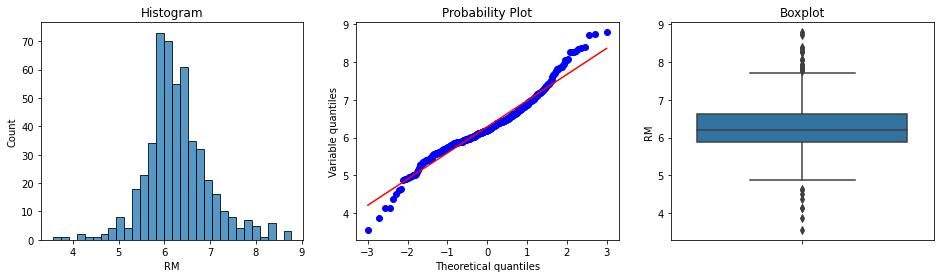

In [ ]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

# let's find outliers in RM
diagnostic_plots(boston, 'RM')

## IQR Proximity Rule

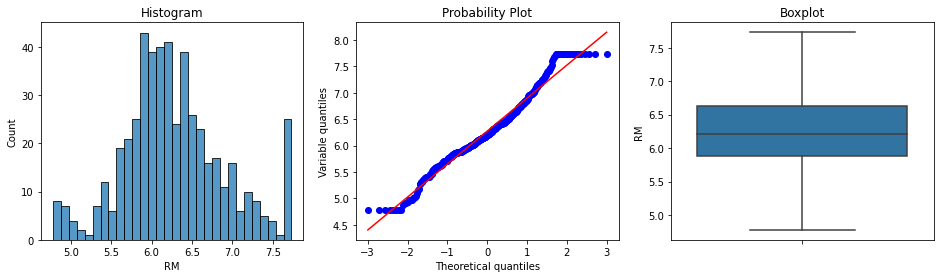

{'CRIM': 9.06963875, 'LSTAT': 31.962500000000006, 'RM': 7.730499999999999}

In [ ]:
# create the capper

windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

boston_t = windsoriser.transform(boston)

diagnostic_plots(boston_t, 'RM')

# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

## Gaussian

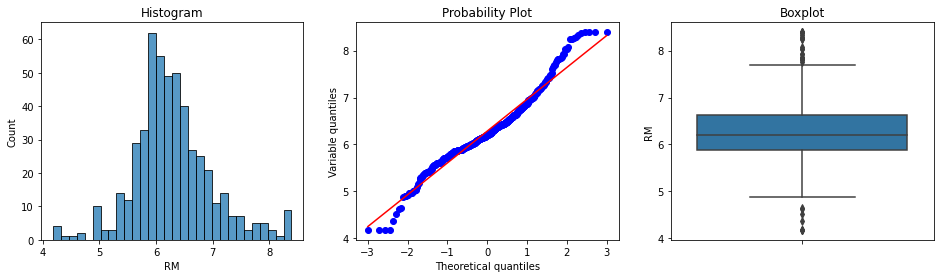

{'CRIM': 29.418158873309714,
 'LSTAT': 34.07624777515244,
 'RM': 8.392485817597757}

In [ ]:
# create the capper
windsoriser = Winsorizer(capping_method='gaussian', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

boston_t = windsoriser.transform(boston)

diagnostic_plots(boston_t, 'RM')

# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

## Capping Quantiles

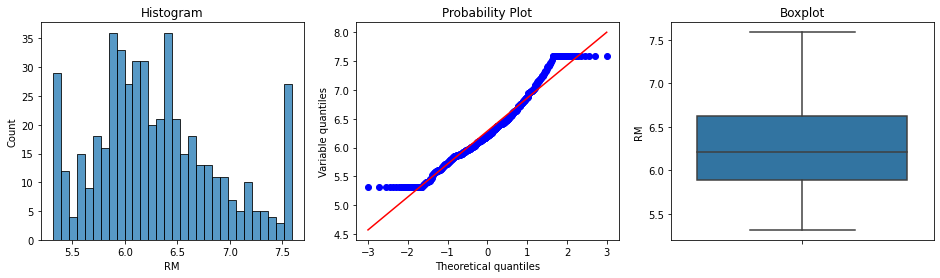

{'CRIM': 15.78915, 'LSTAT': 26.8075, 'RM': 7.5875}

In [ ]:
# create the capper

windsoriser = Winsorizer(capping_method='quantiles', # choose from iqr, gaussian or quantiles
                          tail='both', # cap left, right or both tails 
                          fold=0.05,
                          variables=['RM', 'LSTAT', 'CRIM'])

windsoriser.fit(boston)

boston_t = windsoriser.transform(boston)

diagnostic_plots(boston_t, 'RM')

# we can inspect the minimum caps for each variable
windsoriser.left_tail_caps_

# we can inspect the maximum caps for each variable
windsoriser.right_tail_caps_

## Capping Arbitrary

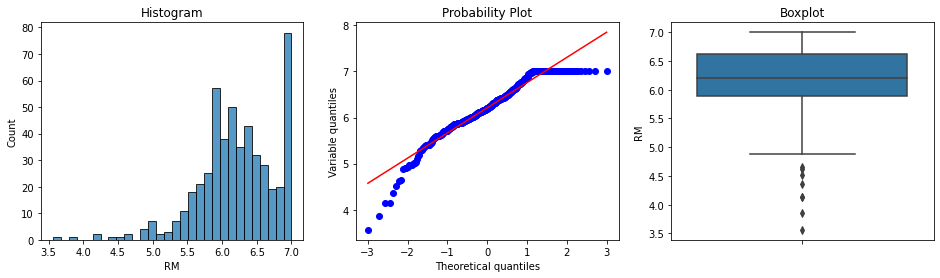

{'RM': 7}

In [ ]:
capper = ArbitraryOutlierCapper(max_capping_dict={
    'RM': 7},
    min_capping_dict={
    'RM': 3})

capper.fit(boston)

boston_t = capper.transform(boston)

diagnostic_plots(boston_t, 'RM')

# we can inspect the minimum caps for each variable
capper.left_tail_caps_

# we can inspect the maximum caps for each variable
capper.right_tail_caps_

# Feature Scaling

In [ ]:
# load the the Boston House price data

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add target
data['MEDV'] = boston_dataset.target

# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                                    data['MEDV'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Standardisation

In [ ]:
# standardisation: with the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the scaler stores the mean of the features, learned from train set
scaler.mean_

# the scaler stores the standard deviation deviation of the features,
# learned from train set
scaler.scale_

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train.describe(), 1)

# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.4,-0.5,-1.5,-0.3,-1.5,-3.9,-2.4,-1.3,-1.0,-1.3,-2.6,-4.2,-1.5
25%,-0.4,-0.5,-0.9,-0.3,-0.9,-0.6,-0.9,-0.8,-0.6,-0.7,-0.5,0.2,-0.8
50%,-0.4,-0.5,-0.4,-0.3,-0.2,-0.1,0.4,-0.3,-0.5,-0.5,0.3,0.4,-0.2
75%,-0.0,0.3,1.0,-0.3,0.6,0.5,0.9,0.6,1.7,1.6,0.8,0.4,0.6
max,10.3,3.7,2.4,3.8,2.7,3.5,1.1,4.1,1.7,1.8,1.6,0.4,3.5


## Mean-normalisation

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# set up the StandardScaler so that it removes the mean
# but does not divide by the standard deviation
scaler_mean = StandardScaler(with_mean=True, with_std=False)

# set up the robustscaler so that it does NOT remove the median
# but normalises by max()-min(), important for this to set up the
# quantile range to 0 and 100, which represent the min and max values
scaler_minmax = RobustScaler(with_centering=False,
                             with_scaling=True,
                             quantile_range=(0, 100))

# fit the scalers to the train set, it will learn the parameters
scaler_mean.fit(X_train)
scaler_minmax.fit(X_train)

# transform train and test sets
X_train_scaled = scaler_minmax.transform(scaler_mean.transform(X_train))
X_test_scaled = scaler_minmax.transform(scaler_mean.transform(X_test))

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train.describe(), 1)

# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,-0.0,-0.1,-0.4,-0.1,-0.4,-0.5,-0.7,-0.2,-0.4,-0.4,-0.6,-0.9,-0.3
25%,-0.0,-0.1,-0.2,-0.1,-0.2,-0.1,-0.2,-0.2,-0.2,-0.2,-0.1,0.0,-0.2
50%,-0.0,-0.1,-0.1,-0.1,-0.0,-0.0,0.1,-0.0,-0.2,-0.2,0.1,0.1,-0.0
75%,-0.0,0.1,0.3,-0.1,0.2,0.1,0.3,0.1,0.6,0.5,0.2,0.1,0.1
max,1.0,0.9,0.6,0.9,0.6,0.5,0.3,0.8,0.6,0.6,0.4,0.1,0.7


## Min Max Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_

# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_

# the scaler also stores the value range (max -  min)
scaler.data_range_

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train.describe(), 1)

# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.4,0.5,0.7,0.2,0.4,0.4,0.6,0.9,0.3
std,0.1,0.2,0.3,0.2,0.2,0.1,0.3,0.2,0.4,0.3,0.2,0.2,0.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.1,0.4,0.4,0.1,0.1,0.2,0.5,0.9,0.1
50%,0.0,0.0,0.3,0.0,0.3,0.5,0.8,0.2,0.2,0.2,0.7,1.0,0.3
75%,0.0,0.2,0.6,0.0,0.5,0.6,0.9,0.4,1.0,0.9,0.8,1.0,0.4
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Maximum Absolute Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's have a look at the original training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train.describe(), 1)

# let's have a look at the scaled training dataset: mean and standard deviation
# I use np.round to reduce the number of decimals to 1.
np.round(X_train_scaled.describe(), 1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0,354.0
mean,0.0,0.1,0.4,0.1,0.6,0.7,0.7,0.3,0.4,0.6,0.8,0.9,0.3
std,0.1,0.2,0.3,0.2,0.1,0.1,0.3,0.2,0.4,0.2,0.1,0.2,0.2
min,0.0,0.0,0.0,0.0,0.4,0.4,0.0,0.1,0.0,0.3,0.6,0.0,0.0
25%,0.0,0.0,0.2,0.0,0.5,0.7,0.5,0.2,0.2,0.4,0.8,0.9,0.2
50%,0.0,0.0,0.3,0.0,0.6,0.7,0.8,0.3,0.2,0.4,0.9,1.0,0.3
75%,0.0,0.2,0.7,0.0,0.7,0.8,0.9,0.4,1.0,0.9,0.9,1.0,0.5
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# the scaler stores the median values of the features as learned from train set
scaler.center_

# the scaler stores the IQR values of the features as learned from train set
scaler.scale_

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's have a look at the original training dataset: median values
# I use np.round to reduce the number of decimals to 1.
np.round(X_train.median(), 1)

# let's have a look at the scaled training dataset: median values
# I use np.round to reduce the number of decimals to 1.
np.round(X_train_scaled.median(), 1)

CRIM      -0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM        -0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B         -0.0
LSTAT      0.0
dtype: float64

## Scaling to unit length

In [ ]:
from sklearn.preprocessing import Normalizer

# set up the scaler
scaler = Normalizer(norm='l1') 
#scaler = Normalizer(norm='l2') 

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
# let's look at the individual values of the variables in the original data
X_train.describe()

# let's look at the individual values of the variables in the original data
X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.003022,0.014491,0.011731,0.000073,0.000620,0.007221,0.075687,0.004479,0.009336,0.427642,0.020880,0.411273,0.013544
std,0.007018,0.028764,0.006854,0.000283,0.000115,0.001620,0.029466,0.002780,0.007262,0.114922,0.003751,0.124328,0.007204
min,0.000008,0.000000,0.000577,0.000000,0.000424,0.002996,0.004348,0.000919,0.001163,0.250885,0.014363,0.000374,0.001879
25%,0.000093,0.000000,0.006243,0.000000,0.000545,0.006061,0.055411,0.002206,0.004740,0.346035,0.016876,0.318534,0.008473
50%,0.000311,0.000000,0.010421,0.000000,0.000611,0.007376,0.078917,0.003923,0.006021,0.393483,0.021129,0.456271,0.012262
75%,0.002983,0.024709,0.015120,0.000000,0.000657,0.008358,0.098186,0.006456,0.018223,0.526258,0.024014,0.498519,0.017204
max,0.066782,0.121905,0.035787,0.001422,0.001337,0.011541,0.144310,0.016269,0.028684,0.795970,0.030523,0.578661,0.041723


# Engineering Date Time

In [ ]:
# let's create a toy data set: 1 column 7 different timestamps,
# 1 hr difference between timestamp

date = pd.Series(pd.date_range('2015-1-5 11:20:00', periods=7, freq='D'))

df = pd.DataFrame(dict(date=date))

df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df['time'] = df['date'].dt.time
df[['h','m','s']] = pd.DataFrame([(x.hour, x.minute, x.second) for x in df['time']])
df['week'] = df['date'].dt.week
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['year'] = df['date'].dt.year
df['dayofweek'] = df['date'].dt.dayofweek
df['day'] = df['date'].dt.day

df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,date,hour,min,sec,time,h,m,s,week,month,quarter,year,dayofweek,day
0,2015-01-05 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,0,5
1,2015-01-06 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,1,6
2,2015-01-07 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,2,7
3,2015-01-08 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,3,8
4,2015-01-09 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,4,9
5,2015-01-10 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,5,10
6,2015-01-11 11:20:00,11,20,0,11:20:00,11,20,0,2,1,1,2015,6,11


In [ ]:
# let's create another toy dataframe with 2 timestamp columns
# and 7 rows each, in the first column the timestamps change monthly,
# in the second column the timestamps change weekly

date1 = pd.Series(pd.date_range('2012-1-1 12:00:00', periods=7, freq='M'))
date2 = pd.Series(pd.date_range('2013-3-11 21:45:00', periods=7, freq='W'))
 
df = pd.DataFrame(dict(Start_date = date1, End_date = date2))

# let's calculate the time elapsed in seconds
df['diff_seconds'] = df['End_date'] - df['Start_date']
df['diff_seconds']=df['diff_seconds']/np.timedelta64(1,'s')
df

,Start_date,End_date,diff_seconds
0,2012-01-31 12:00:00,2013-03-17 21:45:00,35545500.0
1,2012-02-29 12:00:00,2013-03-24 21:45:00,33644700.0
2,2012-03-31 12:00:00,2013-03-31 21:45:00,31571100.0
3,2012-04-30 12:00:00,2013-04-07 21:45:00,29583900.0
4,2012-05-31 12:00:00,2013-04-14 21:45:00,27510300.0
5,2012-06-30 12:00:00,2013-04-21 21:45:00,25523100.0
6,2012-07-31 12:00:00,2013-04-28 21:45:00,23449500.0


# Pipeline

## Classification

In [ ]:
# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

# load dataset
cols = [
    'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
    'embarked', 'survived'
]

data = pd.read_csv('source_code/Datasets/titanic.csv', usecols=cols)
data.loc[data.age == "?", "age"] = np.nan
data['age'] = data['age'].astype('float')
data.loc[data.fare == "?", "fare"] = np.nan
data['fare'] = data['fare'].astype('float')

# Cabin
data['cabin_num'] = data['cabin'].str.extract('(\d+)') # captures numerical part
data['cabin_num'] = data['cabin_num'].astype('float')
data['cabin_cat'] = data['cabin'].str[0] # captures the first letter
data.drop(['cabin'], axis=1, inplace=True)

# separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1178, 9), (131, 9))

Train set
GBM roc-auc: 0.9261637899509982
Test set
GBM roc-auc: 0.8426204819277108


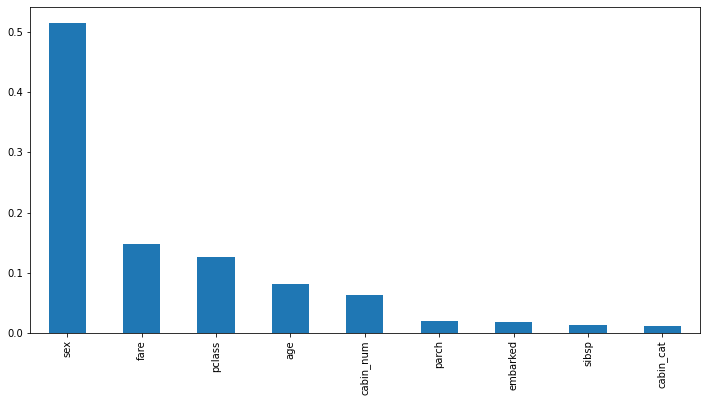

In [ ]:
titanic_pipe = Pipeline([

    # missing data imputation - section 4
    ('imputer_num',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['age', 'fare', 'cabin_num'])),
    ('imputer_cat',
     mdi.CategoricalImputer(variables=['embarked', 'cabin_cat'])),

    # categorical encoding - section 6
    ('encoder_rare_label',
     ce.RareLabelEncoder(tol=0.01,
                                    n_categories=6,
                                    variables=['cabin_cat'])),
    ('categorical_encoder',
     ce.OrdinalEncoder(encoding_method='ordered',
                                  variables=['cabin_cat', 'sex', 'embarked'])),

    # Gradient Boosted machine
    ('gbm', GradientBoostingClassifier(random_state=0))
])

# let's fit the pipeline and make predictions
titanic_pipe.fit(X_train, y_train)

X_train_preds = titanic_pipe.predict_proba(X_train)[:,1]
X_test_preds = titanic_pipe.predict_proba(X_test)[:,1]

# a peek into the prediction values
X_train_preds

print('Train set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_train, X_train_preds)))

print('Test set')
print('GBM roc-auc: {}'.format(roc_auc_score(y_test, X_test_preds)))

# let's explore the importance of the features
importance = pd.Series(titanic_pipe.named_steps['gbm'].feature_importances_)
importance.index = data.drop('survived', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))

## Regression

In [ ]:
from math import sqrt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

# load dataset
data = pd.read_csv('source_code/Datasets/houseprice.csv')

print(data.shape)

# find continuous variables
# let's remember to skip the Id variable and the target variable SalePrice
# which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in [
    'Id', 'SalePrice'] and var not in year_vars]

print('There are {} numerical and continuous variables'.format(len(numerical)))

# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(data[var].unique()) < 20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables'.format(len(categorical)))

# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(['Id', 'SalePrice'], axis=1),
                                                    data['SalePrice'],
                                                    test_size=0.1,
                                                    random_state=0)

X_train.shape, X_test.shape

(1460, 81)
There are 18 numerical and continuous variables

There are 0 discrete variables
There are 43 categorical variables


((1314, 79), (146, 79))

In [ ]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

house_pipe = Pipeline([

    # missing data imputation - section 4
    ('missing_ind', mdi.AddMissingIndicator(
        variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['LotFrontage', 'MasVnrArea',  'GarageYrBlt'])),
    
    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),

    # categorical encoding - section 6
    ('rare_label_enc', ce.RareLabelEncoder(
        tol=0.05, n_categories=6, variables=categorical+discrete)),
    
    ('categorical_enc', ce.OrdinalEncoder(
        encoding_method='ordered', variables=categorical+discrete)),

    # discretisation + encoding - section 8
    ('discretisation', dsc.EqualFrequencyDiscretiser(
        q=5, return_object=True, variables=numerical)),
    
    ('encoding', ce.OrdinalEncoder(
        encoding_method='ordered', variables=numerical)),

    # feature Scaling - section 10
    ('scaler', StandardScaler()),
    
    # regression
    ('lasso', Lasso(random_state=0))
])

# let's fit the pipeline
house_pipe.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe.predict(X_train)
X_test_preds = house_pipe.predict(X_test)

/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  "considered frequent".format(var)
/usr/local/lib/python3.7/dist-packages/feature_engine/encoding/rare_label.py:160: UserWarning: The number of unique categories for variable LotShape is less than that i

train mse: 972445098.5971379
train rmse: 31184.051991316617
train r2: 0.8442550796018164

test mse: 2074551672.090255
test rmse: 45547.24659175629
test r2: 0.6981203624275052


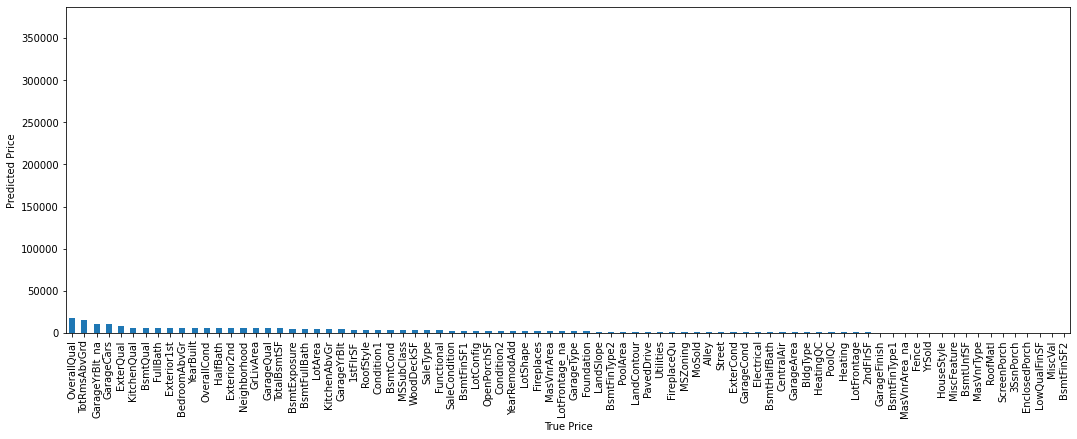

In [ ]:
# a peek into the prediction values
X_train_preds

# capture the column names for use later in the notebook
final_columns = X_train.columns

# check model performance:
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

# plot predictions vs real value
plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

## Assembling pipeline with cross validation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline

# for feature engineering
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

# load dataset
cols = [
    'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin',
    'embarked', 'survived'
]

data = pd.read_csv('source_code/Datasets/titanic.csv', usecols=cols)
data.loc[data.age == "?", "age"] = np.nan
data['age'] = data['age'].astype('float')
data.loc[data.fare == "?", "fare"] = np.nan
data['fare'] = data['fare'].astype('float')

# Cabin
data['cabin_num'] = data['cabin'].str.extract('(\d+)') # captures numerical part
data['cabin_num'] = data['cabin_num'].astype('float')
data['cabin_cat'] = data['cabin'].str[0] # captures the first letter
data.drop(['cabin'], axis=1, inplace=True)

# make list of variables types

# numerical: discrete and continuous
discrete = [
    var for var in data.columns if data[var].dtype != 'O' and var != 'survived'
    and data[var].nunique() < 10
]
continuous = [
    var for var in data.columns
    if data[var].dtype != 'O' and var != 'survived' and var not in discrete
]

# categorical
categorical = [var for var in data.columns if data[var].dtype == 'O']

print('There are {} discrete variables'.format(len(discrete)))
print('There are {} continuous variables'.format(len(continuous)))
print('There are {} categorical variables'.format(len(categorical)))

# separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

There are 3 discrete variables
There are 3 continuous variables
There are 3 categorical variables


((1178, 9), (131, 9))

In [ ]:
titanic_pipe = Pipeline([

    # missing data imputation - section 4
    ('imputer_num',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['age', 'fare', 'cabin_num'])),
    ('imputer_cat',
     mdi.CategoricalImputer(variables=['embarked', 'cabin_cat'])),

    # categorical encoding - section 6
    ('encoder_rare_label',
     ce.RareLabelEncoder(tol=0.01,
                                    n_categories=2,
                                    variables=['embarked', 'cabin_cat'])),
    ('categorical_encoder',
     ce.OrdinalEncoder(encoding_method='ordered',
                                  variables=['cabin_cat', 'sex', 'embarked'])),

    # Gradient Boosted machine
    ('gbm', GradientBoostingClassifier(random_state=0))
])

# now we create the grid with all the parameters that we would like to test

param_grid = {
    # try different feature engineering parameters
    'imputer_num__arbitrary_number': [-1, 99],
    'encoder_rare_label__tol': [0.1, 0.2],
    'categorical_encoder__encoding_method': ['ordered', 'arbitrary'],
    
    # try different gradient boosted tree model paramenters
    'gbm__max_depth': [None, 1, 3],
}


# now we set up the grid search with cross-validation
grid_search = GridSearchCV(titanic_pipe, param_grid,
                           cv=5, n_jobs=-1, scoring='roc_auc')

# cv=5 is the cross-validation steps
# no_jobs =-1 indicates to use all available cpus
# scoring='roc-auc' indicates to evaluate the model performance with the roc-auc

# for more details in the grid parameters visit:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# and now we train over all the possible combinations of the parameters above
grid_search.fit(X_train, y_train)

# and we print the best score over the train set
print(("best roc-auc from grid search: %.3f"
       % grid_search.score(X_train, y_train)))

best roc-auc from grid search: 0.929


best linear regression from grid search: 0.841


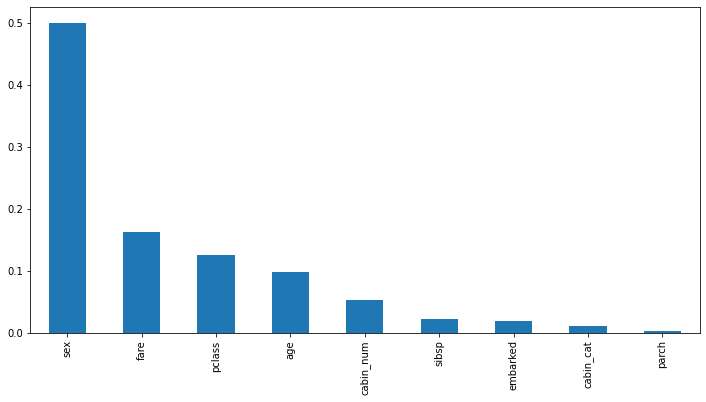

In [ ]:
# we can print the best estimator parameters like this
grid_search.best_estimator_

# and find the best fit parameters like this
grid_search.best_params_

# here we can see all the combinations evaluated during the gridsearch
grid_search.cv_results_['params']

# and here the scores for each of one of the above combinations
grid_search.cv_results_['mean_test_score']

# and finally let's check the performance over the test set
print(("best linear regression from grid search: %.3f"
       % grid_search.score(X_test, y_test)))

# let's explore the importance of the features

importance = pd.Series(grid_search.best_estimator_['gbm'].feature_importances_)
importance.index = data.drop('survived', axis=1).columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(12,6))